In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np

plt.style.use("seaborn-deep")

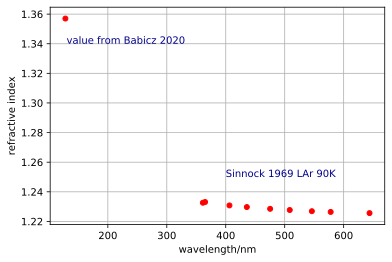

In [18]:
# data at 90K
wavelength = [128, 361.2, 365, 406.3, 435.8, 475.3, 508.6, 546.1, 578, 643.9]
rindex = [1.357, 1.2326, 1.2331, 1.2308, 1.2297, 1.2285,  1.2277, 1.2269, 1.2264, 1.2256]
rindex_err = [0.001 for i in range(len(wavelength))]

plt.errorbar(wavelength, rindex, yerr=rindex_err, fmt="o", ms=5, color='red')
plt.text(130, 1.34,"value from Babicz 2020", color='darkblue')
plt.text(400, 1.25, 'Sinnock 1969 LAr 90K', color='darkblue')
plt.xlabel("wavelength/nm")
plt.ylabel("refractive index")
plt.grid(True)
plt.savefig('rindex_data.pdf')
plt.show()

In [22]:
def load(filename):
    wl, trans, err = [], [], []
    with open(filename) as f:
        for lines in f.readlines():
            line = lines.strip("\n")
            data = line.split(" ")
            wl.append(float(data[0]))
            trans.append(float(data[1]))
            err.append(float(data[2]))
    return np.array(wl), np.array(trans), np.array(err)

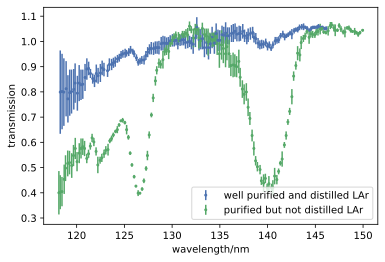

In [27]:
wl1, trans1, err1 = load("../Fitter/data/data2012.txt")
plt.errorbar(wl1, trans1, err1, fmt="o", ms=2, label="well purified and distilled LAr")
wl2, trans2, err2 = load("../Fitter/data/G140ppb.txt")
plt.errorbar(wl2, trans2, err2, fmt="o", ms=2, label="purified but not distilled LAr")

plt.legend()
plt.xlabel("wavelength/nm"); plt.ylabel("transmission")
plt.savefig("trans_2sets.pdf")
plt.show()

In [ ]:
# kappa calculation
def rindex20(x, xUV, xIR, a0, aUV, aIR):
    A = a0 + aUV*x**2/(x**2-xUV**2) + aIR*x**2/(x**2-xIR**2)
    return np.sqrt(1+3*A/(3-A))

def lraymodel(x, n):
    #kT = 2.18E-9
    kT = 2.24442E-9
    kB = 1.380649E-23
    T = 90
    f = 1E22
    return 1/(8*np.pi**3/3/x**4 * ((n**2-1)*(n**2+2)/3)**2 *kB *kT *T *f)


units of variables in LRay formula:

kB: 1.380649*10^-23 (N*m/K)

T: 90 (K)

lambda: 0.128 (um)

kT: 2.25282*10^9 (m^2/N)

f: unit converter (10^22 from um to m)